In [ ]:
import pandas as pd
import numpy as np
import re #regular expression(text pattern matching)
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/Shareddrives/AI/Movie/5. Movie Review Dataset/train_movie_review.csv')
val_df = pd.read_csv('/content/drive/Shareddrives/AI/Movie/5. Movie Review Dataset/val_movie_review.csv')
test_df = pd.read_csv('/content/drive/Shareddrives/AI/Movie/5. Movie Review Dataset/test_movie_review.csv')

In [ ]:
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

print("\nMissing values:")
print("Train:", train_df.isnull().sum())
print("Validation:", val_df.isnull().sum())
print("Test:", test_df.isnull().sum())

Train shape: (35000, 3)
Validation shape: (5000, 3)
Test shape: (10000, 3)

Missing values:
Train: Unnamed: 0    0
review        0
sentiment     0
dtype: int64
Validation: Unnamed: 0    0
review        0
sentiment     0
dtype: int64
Test: Unnamed: 0    0
review        0
sentiment     0
dtype: int64


In [ ]:
print(train_df.columns)
print(val_df.columns)
print(test_df.columns)

Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')
Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')
Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')


In [ ]:

import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text cleaning function
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs, mentions, hashtags, numbers, and special chars
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Handle contractions
    contractions = {
        "don't": "do not", "can't": "cannot", "won't": "will not",
        "it's": "it is", "i'm": "i am", "you're": "you are",
        "they're": "they are", "we're": "we are", "that's": "that is"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

    # Remove stopwords and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
train_df['cleaned_text'] = train_df['review'].apply(clean_text)
val_df['cleaned_text'] = val_df['review'].apply(clean_text)
test_df['cleaned_text'] = test_df['review'].apply(clean_text)

# Verify
print("Original:", train_df['review'].iloc[0])
print("Cleaned:", train_df['cleaned_text'].iloc[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original: Having avoided seeing the movie in the cinema, but buying the DVD for my wife for Xmas, I had to watch it. I did not expect much, which usually means I get more than I bargained for. But 'Mamma Mia' - utter, utter cr**. I like ABBA, I like the songs, I have the old LPs. But this film is just terrible. The stage show looks like a bit of a musical, but this races along with songs hurriedly following one another, no characterisation, the dance numbers (which were heavily choreographed according to the extras on the DVD) are just thrown away with only half the bodies ever on screen, the dance chorus of north Europeans appear on a small Greek island at will, while the set and set up of numbers would have disgraced Cliff Richard's musicals in the sixties!Meryl (see me I'm acting)Streep can't even make her usual mugging effective in an over-the-top musical! Her grand piece - 'The Winner Takes It All' - is Meryl at the Met! Note to director - it should have been shot in stillness wit

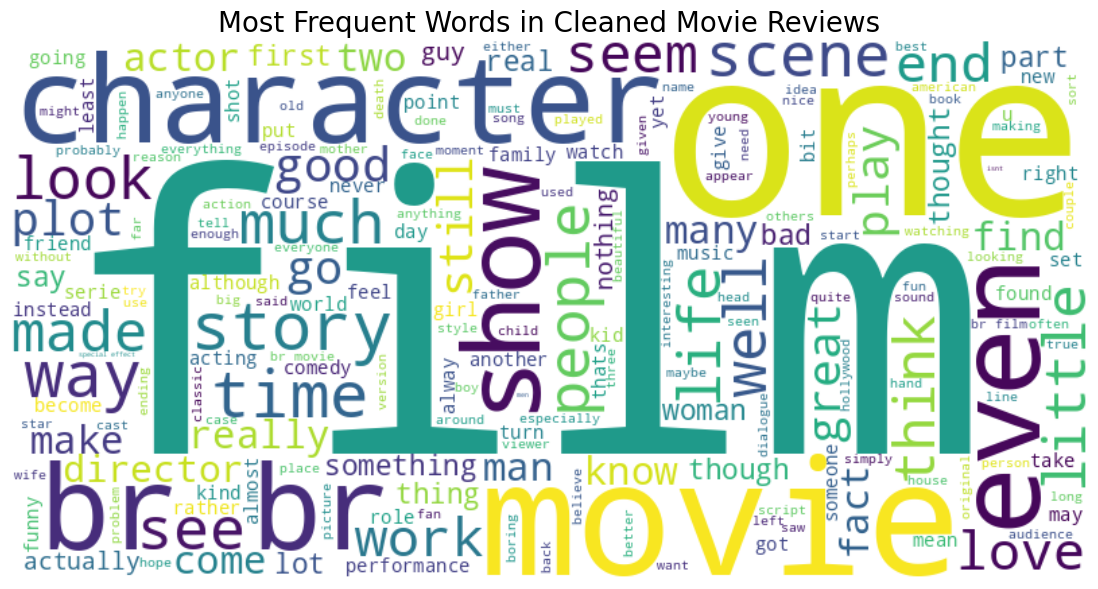

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews into one big string
all_words = ' '.join(train_df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Cleaned Movie Reviews", fontsize=20)
plt.show()


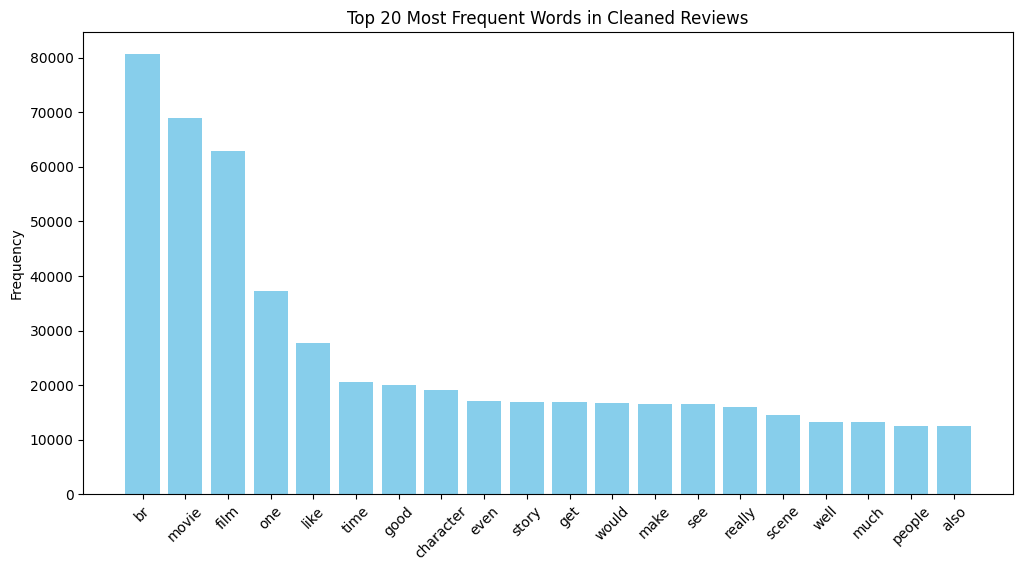

In [ ]:
from collections import Counter

# Split the cleaned text into individual words
words = all_words.split()

# Count the most common words
word_freq = Counter(words).most_common(20)

# Unzip into two lists
words, counts = zip(*word_freq)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Cleaned Reviews")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Initialize Tokenizer (fit ONLY on training data)
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['cleaned_text']) #only fit on training data

# Convert all splits to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_text'])
X_val_seq = tokenizer.texts_to_sequences(val_df['cleaned_text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['cleaned_text'])
print("Training sample sequence:", X_train_seq[0])

Training sample sequence: [4069, 213, 3, 334, 2479, 173, 222, 1, 35, 401, 19, 498, 178, 12, 1, 1, 9297, 1783, 1783, 1, 6, 1, 6, 247, 83, 1, 4, 282, 738, 26, 44, 6, 118, 489, 1084, 240, 247, 1, 794, 5, 74, 6256, 662, 381, 2297, 5272, 1655, 921, 173, 1121, 151, 253, 433, 50, 192, 662, 4800, 2002, 1584, 821, 308, 2555, 775, 131, 131, 381, 13, 1, 3468, 4673, 489, 1, 15, 62, 1, 86, 10, 14, 548, 9298, 1027, 2188, 489, 1592, 238, 1958, 51, 4610, 1620, 655, 65, 136, 1, 267, 3270, 616, 3049, 1711, 3636, 4995, 1009, 292, 1, 1927, 202, 267, 447, 425, 618, 6, 23, 4216, 5, 42, 3570, 259, 126, 4217, 9, 10, 345, 7637, 238, 1, 324, 3553, 1, 4, 2059, 47, 3206, 173, 2537, 2653, 3271, 84, 1, 16, 3786, 2059, 505, 2432, 1, 160]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Calculate 95th percentile of training sequence lengths (avoid outliers)
train_seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(train_seq_lengths, 95))

# Pad all splits to max_len
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

print(f"\nPadded sequences to length (95th percentile): {max_len}")
print("Padded training sample:", X_train_pad[0])


Padded sequences to length (95th percentile): 312
Padded training sample: [4069  213    3  334 2479  173  222    1   35  401   19  498  178   12
    1    1 9297 1783 1783    1    6    1    6  247   83    1    4  282
  738   26   44    6  118  489 1084  240  247    1  794    5   74 6256
  662  381 2297 5272 1655  921  173 1121  151  253  433   50  192  662
 4800 2002 1584  821  308 2555  775  131  131  381   13    1 3468 4673
  489    1   15   62    1   86   10   14  548 9298 1027 2188  489 1592
  238 1958   51 4610 1620  655   65  136    1  267 3270  616 3049 1711
 3636 4995 1009  292    1 1927  202  267  447  425  618    6   23 4216
    5   42 3570  259  126 4217    9   10  345 7637  238    1  324 3553
    1    4 2059   47 3206  173 2537 2653 3271   84    1   16 3786 2059
  505 2432    1  160    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels (e.g., 'positive'=1, 'negative'=0)
le = LabelEncoder()
y_train = le.fit_transform(train_df['sentiment'])
y_val = le.transform(val_df['sentiment'])
y_test = le.transform(test_df['sentiment'])

# Verify
print("\nLabel mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {0: 0, 1: 1}


In [ ]:
# Install required packages
!pip install gensim python-Levenshtein wordcloud nltk tensorflow
!python -m gensim.downloader --download word2vec-google-news-300
!python -m nltk.downloader stopwords wordnet omw-1.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fol

In [ ]:
# Install required packages, ensuring numpy is handled correctly
!pip install --upgrade numpy
!pip install --upgrade gensim python-Levenshtein wordcloud nltk tensorflow

# Download Gensim model and NLTK data
!python -m gensim.downloader --download word2vec-google-news-300
!python -m nltk.downloader stopwords wordnet omw-1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 89.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━

2025-05-16 12:06:48,597 : __main__ : INFO : Data has been installed and data path is /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.initializers import Constant
import numpy as np
import gensim.downloader as api

# Ensure these are defined from preprocessing
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128

In [ ]:
model1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Removed input_length
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build model explicitly to see summary
model1.build(input_shape=(None, max_len))  # max_len from your padding step
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 312, 128)       │    17,084,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,096,449 (65.22 MB)

 Trainable params: 17,096,449 (65.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.build(input_shape=(None, max_len))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 312, 128)       │    17,084,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,133,505 (65.36 MB)

 Trainable params: 17,133,505 (65.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.initializers import Constant
import numpy as np
import gensim.downloader as api

# 3. LSTM with Word2Vec Embeddings
try:
    word2vec = api.load('word2vec-google-news-300')

    # Create embedding matrix
    embedding_matrix = np.zeros((vocab_size, 300))
    for word, i in tokenizer.word_index.items():
        if i < vocab_size and word in word2vec:
            embedding_matrix[i] = word2vec[word]

    model3 = Sequential([
        Embedding(
            input_dim=vocab_size,
            output_dim=300,  # Must match Word2Vec dimension
            input_length=max_len,
            embeddings_initializer=Constant(embedding_matrix)
        ),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    model3.layers[0].trainable = False  # Freeze embeddings

except Exception as e:
    print(f"Word2Vec failed: {e}\nUsing random embeddings instead.")
    model3 = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_len),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.build(input_shape=(None, max_len))
model3.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 312, 300)       │    40,040,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        93,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,134,205 (153.10 MB)

 Trainable params: 93,505 (365.25 KB)

 Non-trainable params: 40,040,700 (152.74 MB)

MODEL TRAINING

In [ ]:
history1 = model1.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,  # Can adjust
    batch_size=64,
    verbose=1
)

history2 = model2.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)

history3 = model3.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 203s 366ms/step - accuracy: 0.5004 - loss: 0.6960 - val_accuracy: 0.5060 - val_loss: 0.6932
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 220s 402ms/step - accuracy: 0.5228 - loss: 0.6770 - val_accuracy: 0.4946 - val_loss: 0.6961
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 200s 365ms/step - accuracy: 0.5208 - loss: 0.6870 - val_accuracy: 0.4938 - val_loss: 0.6961
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 198s 357ms/step - accuracy: 0.5310 - loss: 0.6719 - val_accuracy: 0.5102 - val_loss: 0.6965
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 194s 354ms/step - accuracy: 0.5321 - loss: 0.6676 - val_accuracy: 0.4954 - val_loss: 0.7084
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 205s 360ms/step - accuracy: 0.5266 - loss: 0.6601 - val_accuracy: 0.4942 - val_loss: 0.7168
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 201s 360ms/step - accuracy: 0.5332 - loss: 0.6591 - val_accuracy: 0.4946 - val_loss: 0.7293
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 201s 357ms/step - accuracy: 0.5344 -

In [ ]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy

print("\nTest Set Performance:")
test_acc1 = evaluate_model(model1, X_test_pad, y_test)
test_acc2 = evaluate_model(model2, X_test_pad, y_test)
test_acc3 = evaluate_model(model3, X_test_pad, y_test)


Test Set Performance:
Test Accuracy: 0.4960
Test Accuracy: 0.8772
Test Accuracy: 0.8841


3.3

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Common compilation settings
def compile_model(model):
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Compile all models
compile_model(model1)
compile_model(model2)
compile_model(model3)

In [ ]:
history1 = model1.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,  # Set high, early stopping will intervene
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)
history2 = model2.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)
history3 = model3.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 203s 368ms/step - accuracy: 0.5234 - loss: 0.6657 - val_accuracy: 0.4946 - val_loss: 0.7030
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 201s 367ms/step - accuracy: 0.5301 - loss: 0.6598 - val_accuracy: 0.4948 - val_loss: 0.7277
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 201s 365ms/step - accuracy: 0.5246 - loss: 0.6603 - val_accuracy: 0.4952 - val_loss: 0.7517
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 202s 365ms/step - accuracy: 0.5275 - loss: 0.6578 - val_accuracy: 0.5096 - val_loss: 0.7317
Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 359s 652ms/step - accuracy: 0.9807 - loss: 0.0787 - val_accuracy: 0.8744 - val_loss: 0.4442
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 382s 653ms/step - accuracy: 0.9865 - loss: 0.0651 - val_accuracy: 0.8722 - val_loss: 0.4510
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 394s 675ms/step - accuracy: 0.9886 - loss: 0.0540 - val_accuracy: 0.8696 - val_loss: 0.4564
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 373s 658ms/step - accuracy: 0.9911 -

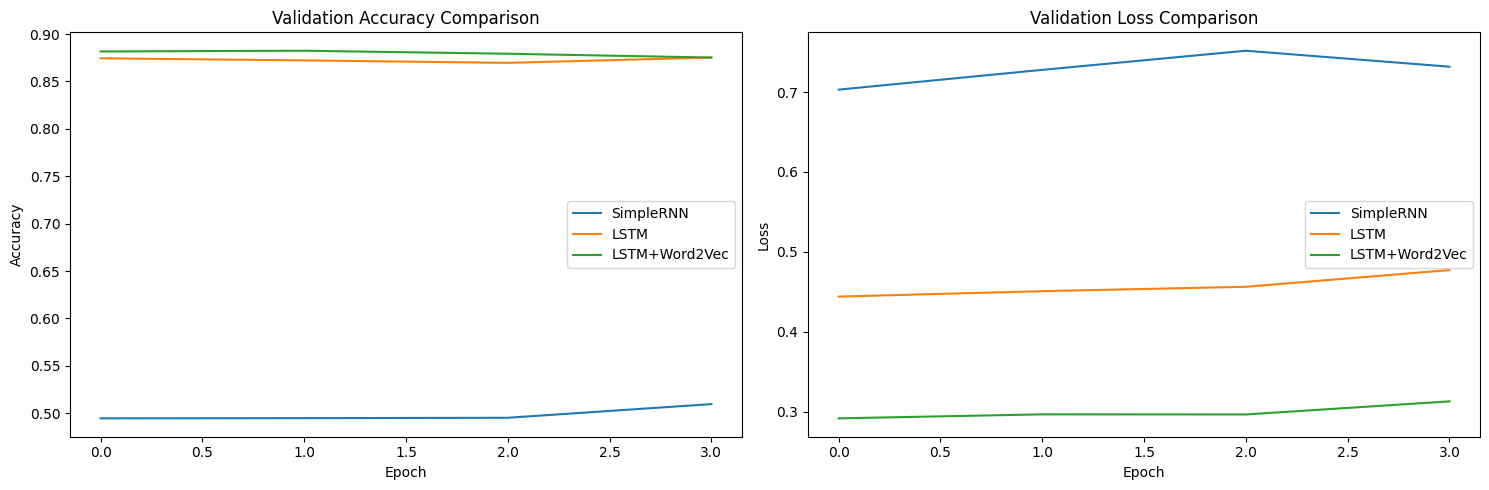

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, model_names):
    plt.figure(figsize=(15, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title('Validation Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], label=name)
    plt.title('Validation Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([history1, history2, history3],
             ['SimpleRNN', 'LSTM', 'LSTM+Word2Vec'])

In [ ]:
import pandas as pd

metrics = []
for name, history in zip(['SimpleRNN', 'LSTM', 'Word2Vec'], [history1, history2, history3]):
    metrics.append({
        'Model': name,
        'Max Val Accuracy': f"{max(history.history['val_accuracy']):.4f}",
        'Final Val Accuracy': f"{history.history['val_accuracy'][-1]:.4f}",
        'Epochs to Converge': np.argmax(history.history['val_accuracy']) + 1
    })

pd.DataFrame(metrics).style.background_gradient(cmap='Blues')

,Model,Max Val Accuracy,Final Val Accuracy,Epochs to Converge
0,SimpleRNN,0.5096,0.5096,4
1,LSTM,0.8752,0.8752,4
2,Word2Vec,0.8824,0.8752,2



SimpleRNN Test Accuracy: 0.4974
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


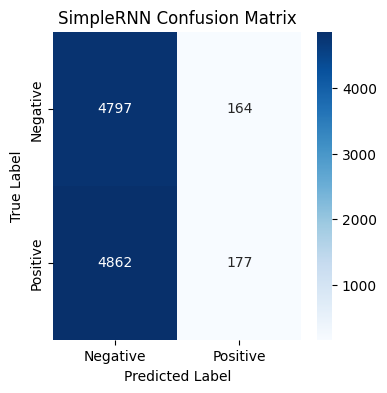


              precision    recall  f1-score   support

    Negative       0.50      0.97      0.66      4961
    Positive       0.52      0.04      0.07      5039

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.36     10000
weighted avg       0.51      0.50      0.36     10000


LSTM Test Accuracy: 0.8727
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step


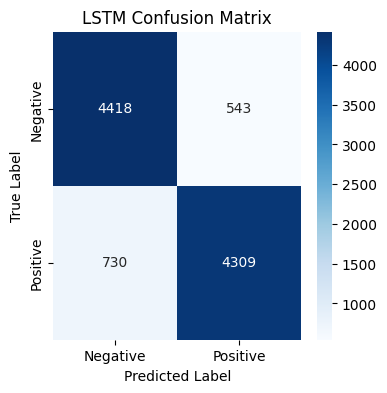


              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87      4961
    Positive       0.89      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


LSTM+Word2Vec Test Accuracy: 0.8827
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step


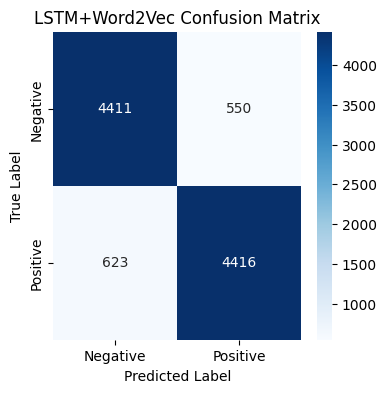


              precision    recall  f1-score   support

    Negative       0.88      0.89      0.88      4961
    Positive       0.89      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    # Accuracy
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{model_name} Test Accuracy: {accuracy:.4f}")

    # Predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification Report
    print(f"\n{classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])}")
    return accuracy

# Evaluate all models
acc1 = evaluate_model(model1, X_test_pad, y_test, "SimpleRNN")
acc2 = evaluate_model(model2, X_test_pad, y_test, "LSTM")
acc3 = evaluate_model(model3, X_test_pad, y_test, "LSTM+Word2Vec")

In [ ]:
# Summary table
import pandas as pd

results = pd.DataFrame({
    'Model': ['SimpleRNN', 'LSTM', 'LSTM+Word2Vec'],
    'Test Accuracy': [acc1, acc2, acc3],
    'Training Epochs': [
        len(history1.history['loss']),
        len(history2.history['loss']),
        len(history3.history['loss'])
    ],
    'Final Val Accuracy': [
        history1.history['val_accuracy'][-1],
        history2.history['val_accuracy'][-1],
        history3.history['val_accuracy'][-1]
    ]
})

print("\nModel Performance Comparison:")
print(results.sort_values('Test Accuracy', ascending=False))


Model Performance Comparison:
           Model  Test Accuracy  Training Epochs  Final Val Accuracy
2  LSTM+Word2Vec         0.8827                4              0.8752
1           LSTM         0.8727                4              0.8752
0      SimpleRNN         0.4974                4              0.5096


In [ ]:
!pip install gradio  # Install Gradio if not already present

import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load your best model (assuming model3 is LSTM+Word2Vec)
best_model = model3

def predict_sentiment(text):
    """Preprocess input text and predict sentiment"""
    # 1. Clean the text (use the same function from training)
    cleaned_text = clean_text(text)

    # 2. Convert to sequence
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # 3. Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')

    # 4. Predict
    prediction = best_model.predict(padded_sequence)[0][0]

    # 5. Convert to label
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if sentiment == "Positive" else 1 - prediction

    return f"{sentiment} ({(confidence*100):.1f}% confident)"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your movie review here..."),
    outputs="text",
    title="Movie Review Sentiment Analysis",
    description="Predicts whether a movie review is positive or negative using LSTM with Word2Vec embeddings.",
    examples=[
        ["This movie was fantastic! The acting was superb."],
        ["Terrible plot and bad acting. Would not recommend."]
    ]
)

# Launch in Colab
interface.launch(debug=True)  # Set debug=False for public links

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3b082b4653f40987a9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio d

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3b082b4653f40987a9.gradio.live


In [ ]:
!pip install gradio  # Install Gradio if not already present

import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load your best model (assuming model3 is LSTM+Word2Vec)
best_model = model3

def predict_sentiment(text):
    """Preprocess input text and predict sentiment"""
    # 1. Clean the text (use the same function from training)
    cleaned_text = clean_text(text)

    # 2. Convert to sequence
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # 3. Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')

    # 4. Predict
    prediction = best_model.predict(padded_sequence)[0][0]

    # 5. Convert to label
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if sentiment == "Positive" else 1 - prediction

    return f"{sentiment} ({(confidence*100):.1f}% confident)"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your movie review here..."),
    outputs="text",
    title="Movie Review Sentiment Analysis",
    description="Predicts whether a movie review is positive or negative using LSTM with Word2Vec embeddings.",
    examples=[
        ["This movie was fantastic! The acting was superb."],
        ["Terrible plot and bad acting. Would not recommend."]
    ]
)

# Launch in Colab
interface.launch(debug=True)  # Set debug=False for public links

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6e0aa8f5fb6d006ead.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6e0aa8f5fb6d006ead.gradio.live


In [ ]:
!pip install gradio  # Install Gradio if not already present

import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load your best model (assuming model3 is LSTM+Word2Vec)
best_model = model3

def predict_sentiment(text):
    """Preprocess input text and predict sentiment"""
    # 1. Clean the text (use the same function from training)
    cleaned_text = clean_text(text)

    # 2. Convert to sequence
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # 3. Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')

    # 4. Predict
    prediction = best_model.predict(padded_sequence)[0][0]

    # 5. Convert to label
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if sentiment == "Positive" else 1 - prediction

    return f"{sentiment} ({(confidence*100):.1f}% confident)"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your movie review here..."),
    outputs="text",
    title="Movie Review Sentiment Analysis",
    description="Predicts whether a movie review is positive or negative using LSTM with Word2Vec embeddings.",
    examples=[
        ["This movie was fantastic! The acting was superb."],
        ["Terrible plot and bad acting. Would not recommend."]
    ]
)

# Launch in Colab
interface.launch(debug=True)  # Set debug=False for public links

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://960e678d5317ab09a2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://960e678d5317ab09a2.gradio.live


In [ ]:
# Save in native format
model1.save("model_rnn.keras")
print(" Model 1 saved as model_rnn.keras")
model2.save("model_lstm.keras")
print(" Model 2 saved as model_rnn.keras")
model3.save("model_lstm_word2vec.keras")
print(" Model 3 saved as model_rnn.keras")

✅ Model 1 saved as model_rnn.keras
✅ Model 2 saved as model_rnn.keras
✅ Model 3 saved as model_rnn.keras
